Ön hazırlık (kütüphane kurulumu)

In [1]:
# Gerekli kütüphaneleri yükleyelim (Colab hücresine)
!pip install cirq qiskit qutip numpy matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.8/31.8 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 61.2 MB/s eta 0:00:00


Deutsch Algoritması


Cirq Örneği

In [2]:
import cirq

# Qubitleri oluştur
q0, q1 = cirq.LineQubit.range(2)

# Fonksiyon (oracle) sabit veya dengeli olabilir
def deutsch_oracle(qubits, balanced=False):
    if balanced:
        return [cirq.CNOT(qubits[0], qubits[1])]
    else:
        return []  # sabit fonksiyon: hiçbir şey yapma

# Devre oluştur
circuit = cirq.Circuit()
circuit.append([cirq.H(q0), cirq.X(q1), cirq.H(q1)])
circuit.append(deutsch_oracle([q0, q1], balanced=True))
circuit.append(cirq.H(q0))
circuit.append(cirq.measure(q0, key='result'))

# Simüle et
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=10)
print(result)


result=1111111111


Qiskit Örneği

In [5]:
from qiskit import QuantumCircuit, Aer, transpile, execute

qc = QuantumCircuit(2,1)
qc.x(1)
qc.h([0,1])

# Oracle
def deutsch_oracle(qc, balanced=False):
    if balanced:
        qc.cx(0,1)

deutsch_oracle(qc, balanced=True)
qc.h(0)
qc.measure(0,0)

sim = Aer.get_backend('aer_simulator')
result = sim.run(qc, shots=10).result()
print(result.get_counts())


ImportError: cannot import name 'Aer' from 'qiskit' (/usr/local/lib/python3.12/dist-packages/qiskit/__init__.py)

QuTiP Örneği

In [6]:
from qutip import *

# Başlangıç durumu |0>|1>
psi0 = tensor(basis(2,0), basis(2,1))
H = snot()  # Hadamard kapısı

# Başlangıçta Hadamard
psi1 = tensor(H*psi0.ptrace(0), H*psi0.ptrace(1))

# Oracle (dengeli)
Uf = cnot()
psi2 = Uf*psi1

# Ölçüm
proj0 = tensor(basis(2,0)*basis(2,0).dag(), qeye(2))
prob0 = expect(proj0, psi2)
print("Qubit 0 ölçüm olasılığı |0>:", prob0)


NameError: name 'snot' is not defined

Deutsch-Jozsa Algoritması


Cirq Örneği

In [4]:
n = 3
qubits = cirq.LineQubit.range(n+1)
circuit = cirq.Circuit()

# Başlangıç ve Hadamard
circuit.append(cirq.X(qubits[-1]))
circuit.append(cirq.H.on_each(*qubits))

# Oracle örneği (dengeli)
def dj_oracle(qubits):
    # Örnek olarak sadece qubit 0 ve 1 arasında CNOT
    return [cirq.CNOT(qubits[0], qubits[-1]), cirq.CNOT(qubits[1], qubits[-1])]

circuit.append(dj_oracle(qubits))
circuit.append(cirq.H.on_each(*qubits[:-1]))
circuit.append(cirq.measure(*qubits[:-1], key='result'))

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=10)
print(result)


result=1111111111, 1111111111, 0000000000


Qiskit Örneği

In [7]:
from qiskit import QuantumCircuit, Aer, execute

n = 3
qc = QuantumCircuit(n+1, n)

qc.x(n)
qc.h(range(n+1))

# Oracle örneği (dengeli)
qc.cx(0,n)
qc.cx(1,n)

qc.h(range(n))
qc.measure(range(n), range(n))

sim = Aer.get_backend('aer_simulator')
result = sim.run(qc, shots=10).result()
print(result.get_counts())


ImportError: cannot import name 'Aer' from 'qiskit' (/usr/local/lib/python3.12/dist-packages/qiskit/__init__.py)

QuTiP Örneği

In [8]:
from qutip import *

n = 3
psi0 = tensor([basis(2,0) for _ in range(n)] + [basis(2,1)])
H = snot()
for i in range(n):
    psi0 = tensor(H*basis(2,0), psi0.ptrace(i+1))

# Oracle örneği: Dengeli
Uf = cnot()
psi1 = Uf*psi0

# Hadamard
for i in range(n):
    psi1 = tensor(H*psi1.ptrace(i), psi1.ptrace(i+1))

# Ölçüm
proj = tensor([basis(2,0)*basis(2,0).dag() for _ in range(n)] + [qeye(2)])
prob0 = expect(proj, psi1)
print("Tüm qubit |0> olasılığı:", prob0)


NameError: name 'snot' is not defined

Bernstein-Vazirani Algoritması


Cirq Örneği

In [9]:
n = 4
s = [1,0,1,1]  # gizli bit dizisi
qubits = cirq.LineQubit.range(n+1)
circuit = cirq.Circuit()

circuit.append(cirq.X(qubits[-1]))
circuit.append(cirq.H.on_each(*qubits))

# Oracle U_f
for i, bit in enumerate(s):
    if bit:
        circuit.append(cirq.CNOT(qubits[i], qubits[-1]))

circuit.append(cirq.H.on_each(*qubits[:-1]))
circuit.append(cirq.measure(*qubits[:-1], key='result'))

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=10)
print(result)


result=1111111111, 0000000000, 1111111111, 1111111111


Qiskit Örneği

In [10]:
n = 4
s = [1,0,1,1]
qc = QuantumCircuit(n+1,n)
qc.x(n)
qc.h(range(n+1))

# Oracle
for i, bit in enumerate(s):
    if bit == 1:
        qc.cx(i,n)

qc.h(range(n))
qc.measure(range(n), range(n))

sim = Aer.get_backend('aer_simulator')
result = sim.run(qc, shots=10).result()
print(result.get_counts())


NameError: name 'Aer' is not defined

QuTiP Örneği

In [11]:
from qutip import *

n = 4
s = [1,0,1,1]
psi0 = tensor([basis(2,0) for _ in range(n)] + [basis(2,1)])
H = snot()
for i in range(n+1):
    psi0 = tensor(H*basis(2,0), psi0.ptrace(i+1))

# Oracle
for i, bit in enumerate(s):
    if bit:
        psi0 = cnot() * psi0

# Hadamard
for i in range(n):
    psi0 = tensor(H*psi0.ptrace(i), psi0.ptrace(i+1))

# Ölçüm
proj = tensor([basis(2,0)*basis(2,0).dag() for _ in range(n)] + [qeye(2)])
prob0 = expect(proj, psi0)
print("Gizli bit dizisi ölçüm olasılığı |0>:", prob0)


NameError: name 'snot' is not defined

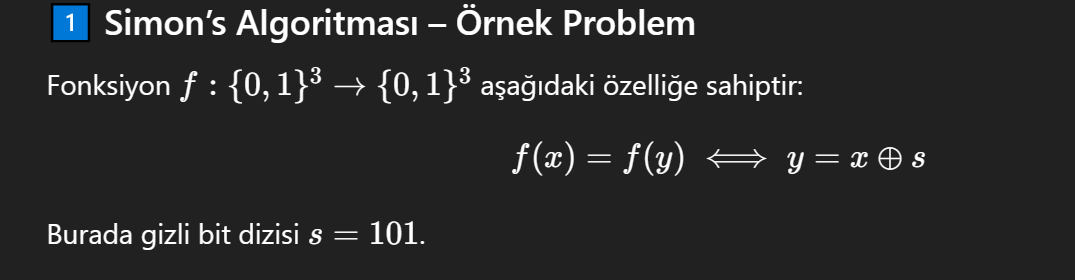

Simon’s Algoritması

Cirq Örneği

In [17]:
import cirq
import numpy as np

# Qubit tanımı
qubits = cirq.LineQubit.range(6)  # 3 input + 3 output qubit

# Gizli bit dizisi
s = [1, 0, 1]

# Oracle fonksiyonu (basitleştirilmiş)
def simon_oracle(qubits):
    circuit = cirq.Circuit()
    # Her bit için XOR maskesi
    for i, bit in enumerate(s):
        if bit == 1:
            circuit.append(cirq.CNOT(qubits[i], qubits[i+3]))
    return circuit

# Devre oluşturma
circuit = cirq.Circuit()
# Başlangıç durumunu hazırlama
circuit.append(cirq.H.on_each(*qubits[:3]))  # Hadamard giriş qubitleri
circuit.append(simon_oracle(qubits))        # Oracle
circuit.append(cirq.H.on_each(*qubits[:3])) # Tekrar Hadamard giriş qubitleri
circuit.append(cirq.measure(*qubits[:3], key='result'))

# Simülasyon
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=10)
print(result)


result=1101101001, 0000000000, 0110101110


Qiskit Örneği

In [13]:
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.visualization import plot_histogram

n = 3
s = [1,0,1]

qc = QuantumCircuit(6,3)  # 3 input + 3 output

# Başlangıç: Hadamard
qc.h(range(n))

# Oracle U_f uygulaması
for i, bit in enumerate(s):
    if bit == 1:
        qc.cx(i, i+n)

# Hadamard tekrar
qc.h(range(n))

# Ölçüm
qc.measure(range(n), range(n))

# Simülasyon
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=10).result()
counts = result.get_counts()
print(counts)


ImportError: cannot import name 'Aer' from 'qiskit' (/usr/local/lib/python3.12/dist-packages/qiskit/__init__.py)

QuTiP Örneği

In [15]:
import qutip as qt
import numpy as np

# Qubit sayısı
n = 3
s = [1,0,1]

# Başlangıç durumu |000000>
psi0 = qt.tensor([qt.basis(2,0)]*6)

# Hadamard operasyonları
H = qt.hadamard_transform()
Hn = qt.tensor([H]*n)

psi1 = Hn * psi0[:n]  # giriş qubitlerine Hadamard
psi1 = qt.tensor(psi1, psi0[n:]) # çıkış qubitleri ekle

# Oracle U_f
U_f = qt.qeye(2**6)
for x in range(2**3):
    y = np.array([int(b) for b in format(x, '03b')])
    y_xor_s = np.bitwise_xor(y, s)
    for i in range(3):
        if y_xor_s[i] == 1:
            # X kapısı simülasyonu
            X = qt.sigmax()
            op_list = [qt.qeye(2)]*6
            op_list[i+3] = X
            U_f = U_f * qt.tensor(op_list)

psi2 = U_f * psi1

# Tekrar Hadamard
psi3 = qt.tensor([H]*n) * psi2[:n]
psi3 = qt.tensor(psi3, psi2[n:])

# Ölçüm olasılıkları
probs = np.abs(psi3.full())**2
print("Olasılıklar: ", probs.flatten())


AttributeError: module 'qutip' has no attribute 'hadamard_transform'